# ***The Spark Foundation Task-5***

Implement an object detector which identifies the classes of the objects in
an image or video.

# ***Dataset Link => *** [Vehicle dataset](https://drive.google.com/drive/folders/1U962g4vqOPdCsJBoij5Fl9Ys4b8DT-5R?usp=sharing)

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# ***Train***
Train a YOLOv5s model on COCO128 with --data coco128.yaml, starting from pretrained --weights yolov5s.pt, or from randomly initialized --weights '' --cfg yolov5s.yaml. Models are downloaded automatically from the latest YOLOv5 release, and COCO, COCO128, and VOC datasets are downloaded automatically on first use.

All training results are saved to runs/train/ with incrementing run directories, i.e. runs/train/exp2, runs/train/exp3 etc.

In [ ]:
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
# train: /content/drive/MyDrive/object data/images/train   # 128 images
# val: /content/drive/MyDrive/object data/images/val  # 128 images

# number of classes
# nc: 2

# class names
# names: [ 'Four Wheeler' , 'Two Wheeler' ]

!python train.py --img 640 --batch 2 --epochs 100 --data coco128.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 v4.0-121-gba18528 torch 1.7.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=2, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', single_cls=False, sync_bn=False, total_batch_size=2, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-07 06:03:58.220029: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succ

# ***Local Logging***
All results are logged by default to runs/train, with a new experiment directory created for each new training as runs/train/exp2, runs/train/exp3, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4.

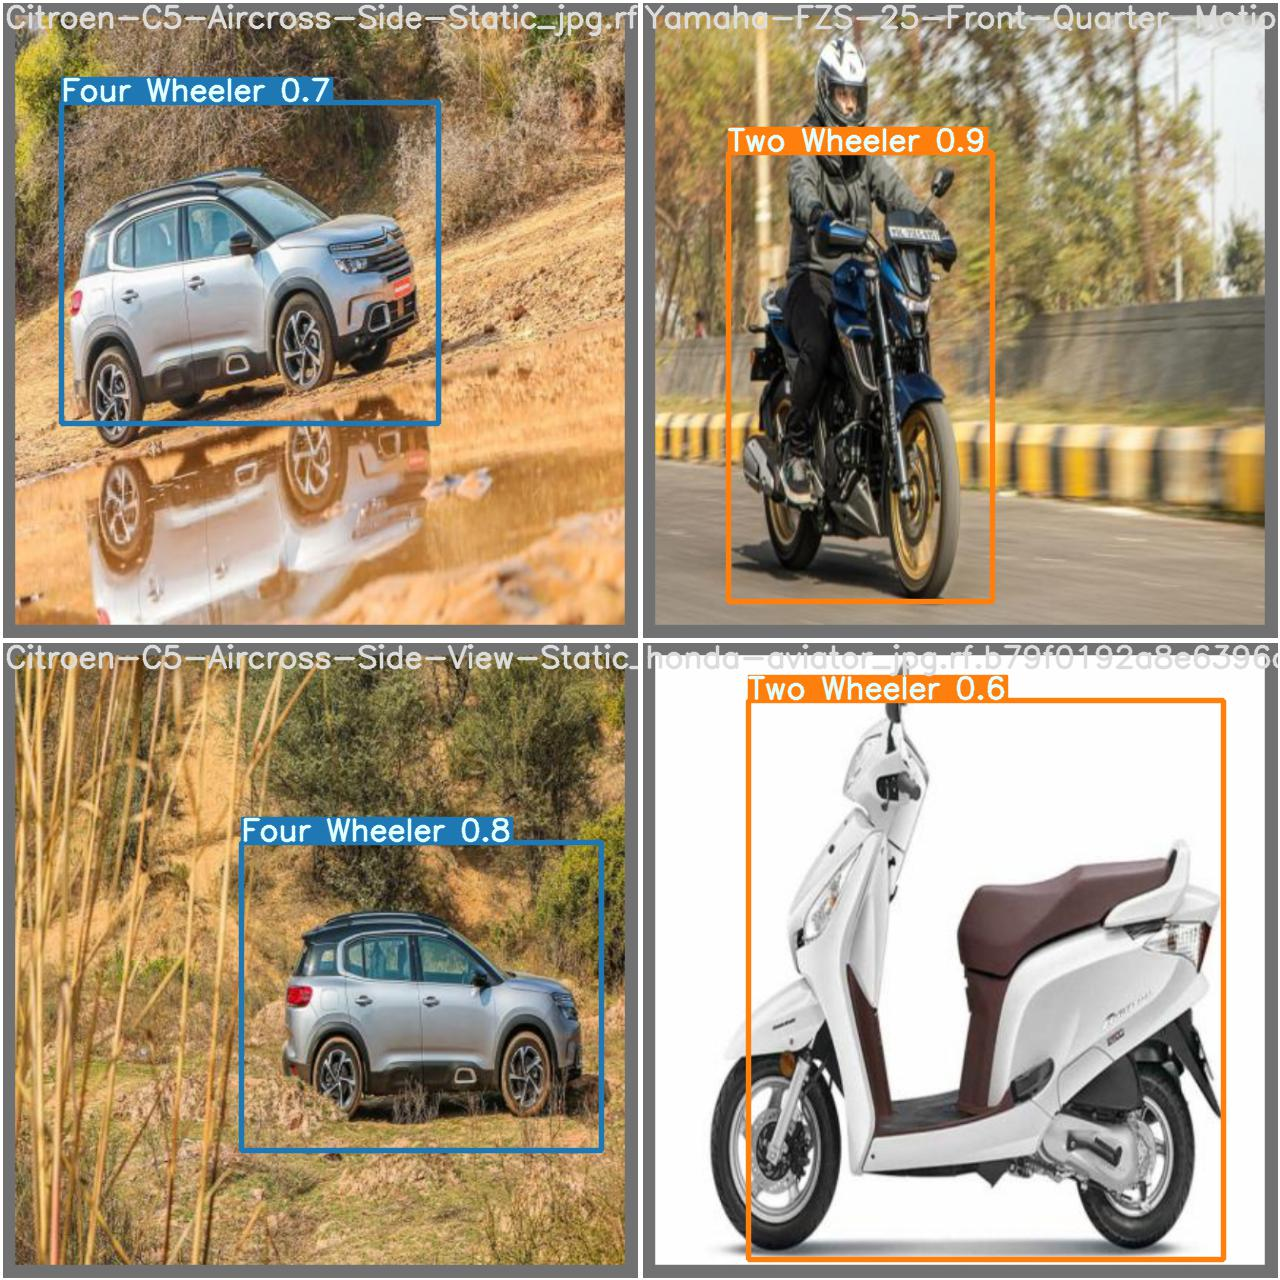

In [ ]:
Image(filename='runs/train/exp2/test_batch1_labels.jpg', width=800)  # test batch 0 labels (Original train image)


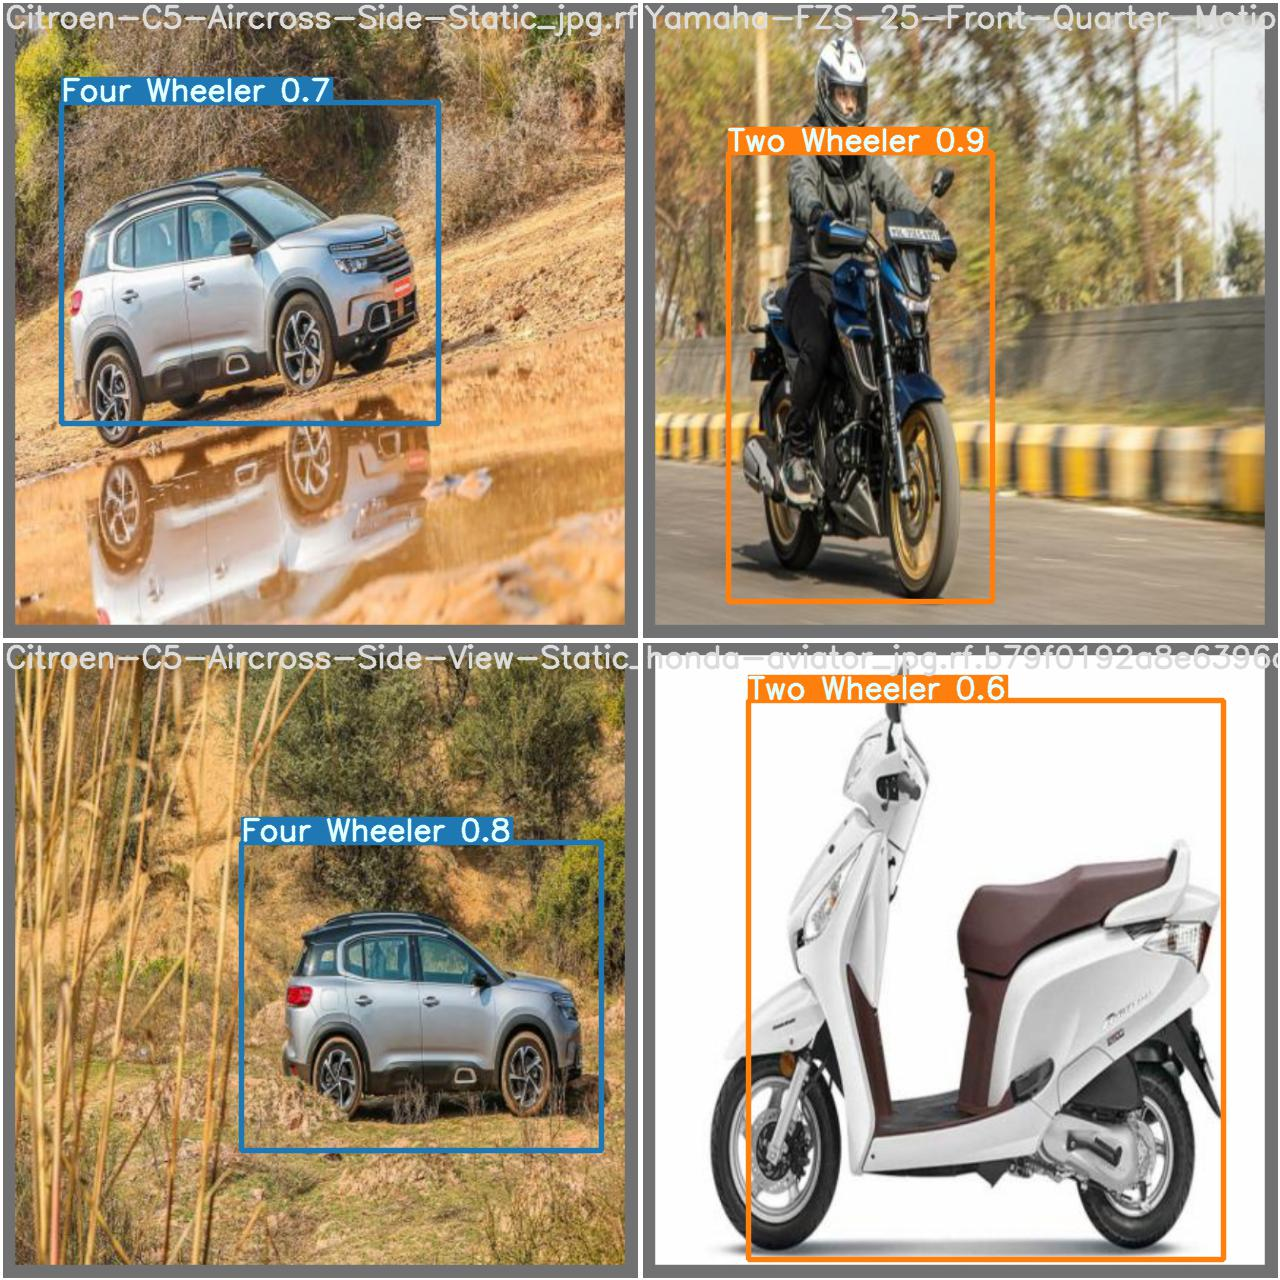

In [ ]:
Image(filename='runs/train/exp2/test_batch1_pred.jpg', width=800)  # test batch 0 predictions (Predicted image)

# ***Test***

# Test on image 

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source '/content/all3.jpg'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/all3.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv5 v4.0-121-gba18528 torch 1.7.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/all3.jpg: 384x640 4 Four Wheelers, Done. (0.011s)
Results saved to runs/detect/exp4
Done. (0.121s)


# Test a video

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source '/content/drive/MyDrive/TSF_task_test.mp4'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/TSF_task_test.mp4', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv5 v4.0-121-gba18528 torch 1.7.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/1184) /content/drive/MyDrive/TSF_task_test.mp4: 384x640 1 Two Wheeler, Done. (0.011s)
video 1/1 (2/1184) /content/drive/MyDrive/TSF_task_test.mp4: 384x640 1 Two Wheeler, Done. (0.009s)
video 1/1 (3/1184) /content/drive/MyDrive/TSF_task_test.mp4: 384x640 1 Two Wheeler, Done. (0.009s)
video 1/1 (4/1184) /content/drive/MyDrive/TSF_task_test.mp4: 384x640 1 Two Wheeler, Done. (0.009s)
video 1/1 (5/1184) /content/drive/MyDrive/TSF_task_test.mp4: 384x640 1 Two Wheeler, Done. (0.009s)
video 1/1 (6/11

# ***Thank You !!!!!!!!***